# Project 7 – Market Basket Analysis

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import os 
import sklearn

import matplotlib
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

from csv import reader

For this assignment, I decided to chose to perform the market basket analysis on a dataset that I found on Kaggle – "Data for Admission in the University" – that contains 400 students' GRE scores, TOEFL scores, university rating, Statement of Purpose and Letter of Recommendation Strength (out of 5), undergraduate GPA, research experience, and lastly the chance of admit (ranging from 0 to 1). 

# Data for Admission in the University
https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university

GRE Scores ( out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose (SOP) and Letter of Recommendation (LOR) Strength ( out of 5 )

Undergraduate GPA ( out of 10 )

Research Experience ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 ).

I cleaned the dataset by removing unnecessary columns for this analysis: 'Serial No.' and 'Chance of Admit'. Serial No. is an unnecessary feature since it can easily be replaced by the pandas dataframe's index.

In [14]:
# importing adm_data.csv into df
filename = os.path.join(os.getcwd(), "adm_data.csv")
df = pd.read_csv(filename, header=0, index_col = False)
df.drop(columns = ['Serial No.'], inplace = True)
# dropping irrelevant features (Serial No.)
df.reset_index(drop = True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


Professor Keene told me that I would need to 'bin up' a lot of my features before I one-hot encode them. In order to do so, I made use of matplotlib's histogram function to divide them into two bins. Then, I used the second item of the bins array created to categorize each of the features into either high or low.

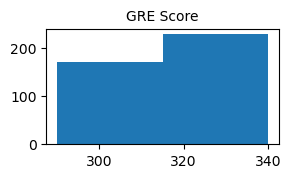

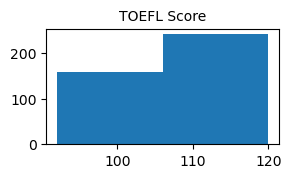

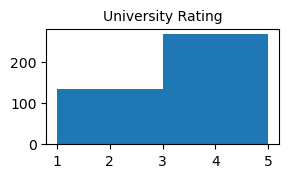

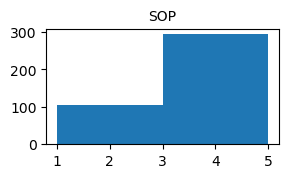

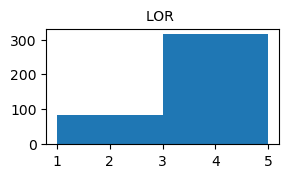

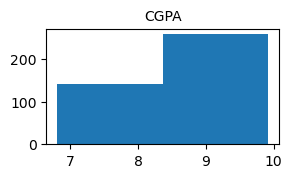

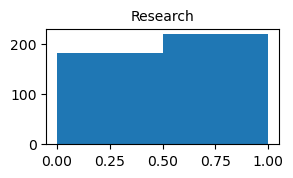

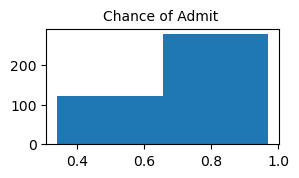

In [15]:
data = df.copy()
features = list(data.columns)
for i in range(len(features)):
    plt.figure(figsize=(3,1.5))
    n, bins, patches = plt.hist(df[features[i]], bins = 2)
    plt.title(features[i], fontsize=10)
    data.loc[(df[features[i]] > bins[1]), features[i]] = 'High '+features[i]
    data.loc[(df[features[i]] <= bins[1]), features[i]] = 'Low '+features[i]

The resulting dataframe looks like below: it is either high [feature_name] or low [feature_name]

In [16]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,High GRE Score,High TOEFL Score,High University Rating,High SOP,High LOR,High CGPA,High Research,High Chance of Admit
1,High GRE Score,High TOEFL Score,High University Rating,High SOP,High LOR,High CGPA,High Research,High Chance of Admit
2,High GRE Score,Low TOEFL Score,Low University Rating,Low SOP,High LOR,Low CGPA,High Research,High Chance of Admit
3,High GRE Score,High TOEFL Score,Low University Rating,High SOP,Low LOR,High CGPA,High Research,High Chance of Admit
4,Low GRE Score,Low TOEFL Score,Low University Rating,Low SOP,Low LOR,Low CGPA,Low Research,Low Chance of Admit
...,...,...,...,...,...,...,...,...
395,High GRE Score,High TOEFL Score,Low University Rating,High SOP,High LOR,High CGPA,High Research,High Chance of Admit
396,High GRE Score,High TOEFL Score,Low University Rating,Low SOP,High LOR,High CGPA,High Research,High Chance of Admit
397,High GRE Score,High TOEFL Score,High University Rating,High SOP,High LOR,High CGPA,High Research,High Chance of Admit
398,Low GRE Score,Low TOEFL Score,Low University Rating,High SOP,High LOR,High CGPA,Low Research,High Chance of Admit


Then, each of the student's data was appended to a list called 'dataset'.

In [17]:
# An empty list to store each student's info:
dataset = []

for i in range(len(data)):
    dataset.append(list(data.iloc[i]))
    
dataset

[['High GRE Score',
  'High TOEFL Score',
  'High University Rating',
  'High SOP',
  'High LOR ',
  'High CGPA',
  'High Research',
  'High Chance of Admit '],
 ['High GRE Score',
  'High TOEFL Score',
  'High University Rating',
  'High SOP',
  'High LOR ',
  'High CGPA',
  'High Research',
  'High Chance of Admit '],
 ['High GRE Score',
  'Low TOEFL Score',
  'Low University Rating',
  'Low SOP',
  'High LOR ',
  'Low CGPA',
  'High Research',
  'High Chance of Admit '],
 ['High GRE Score',
  'High TOEFL Score',
  'Low University Rating',
  'High SOP',
  'Low LOR ',
  'High CGPA',
  'High Research',
  'High Chance of Admit '],
 ['Low GRE Score',
  'Low TOEFL Score',
  'Low University Rating',
  'Low SOP',
  'Low LOR ',
  'Low CGPA',
  'Low Research',
  'Low Chance of Admit '],
 ['High GRE Score',
  'High TOEFL Score',
  'High University Rating',
  'High SOP',
  'Low LOR ',
  'High CGPA',
  'High Research',
  'High Chance of Admit '],
 ['High GRE Score',
  'High TOEFL Score',
  'Low 

Then I utilized the TransactionEncoder function to go through each of the items in the dataset, and create a new pandas dataframe that classifies the item as True or False.

In [18]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded

,High CGPA,High Chance of Admit,High GRE Score,High LOR,High Research,High SOP,High TOEFL Score,High University Rating,Low CGPA,Low Chance of Admit,Low GRE Score,Low LOR,Low Research,Low SOP,Low TOEFL Score,Low University Rating
0,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,True,True,False,False,False,True,False,False,False,False,True,True,True
3,True,True,True,False,True,True,True,False,False,False,False,True,False,False,False,True
4,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,True
396,True,True,True,True,True,False,True,False,False,False,False,False,False,True,False,True
397,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False
398,True,True,False,True,False,True,False,False,False,False,True,False,True,False,True,True


In [11]:
# Itemsets with a minimum support of ...
apriori(df_encoded, min_support=0.5)

,support,itemsets
0,0.6375,(0)
1,0.5475,(1)
2,0.5750,(2)
3,0.5475,(3)
4,0.5750,(4)
5,0.5425,(5)
6,0.6650,(13)


In [21]:
frequent_itemsets = apriori(df_encoded, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6375,(High CGPA),1
1,0.6950,(High Chance of Admit ),1
2,0.5475,(High GRE Score),1
3,0.5750,(High LOR ),1
4,0.5475,(High Research),1
5,0.5750,(High SOP),1
6,0.5425,(High TOEFL Score),1
7,0.3350,(High University Rating),1
8,0.3625,(Low CGPA),1
9,0.3050,(Low Chance of Admit ),1


In [22]:
frequent_itemsets[(frequent_itemsets['length'] > 1) & (frequent_itemsets['support'] >= 0.4) ]

,support,itemsets,length
16,0.5825,"(High Chance of Admit , High CGPA)",2
17,0.4950,"(High GRE Score, High CGPA)",2
18,0.4775,"(High LOR , High CGPA)",2
19,0.4425,"(High CGPA, High Research)",2
20,0.4875,"(High CGPA, High SOP)",2
21,0.4975,"(High TOEFL Score, High CGPA)",2
24,0.5050,"(High Chance of Admit , High GRE Score)",2
25,0.5100,"(High LOR , High Chance of Admit )",2
26,0.4775,"(High Chance of Admit , High Research)",2
27,0.4950,"(High Chance of Admit , High SOP)",2


In [24]:
rules = association_rules(frequent_itemsets, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift', 'support'], ascending =[False, False, False]) 
pd.set_option('display.max_rows', len(rules))
rules.head(10)
     

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1201,"(High TOEFL Score, High LOR , High GRE Score, ...",(High CGPA),0.3250,0.6375,0.3250,1.000000,1.568627,0.117813,inf
1444,"(High TOEFL Score, High LOR , High Chance of A...",(High CGPA),0.3200,0.6375,0.3200,1.000000,1.568627,0.116000,inf
686,"(High TOEFL Score, High GRE Score, High Research)",(High Chance of Admit ),0.3800,0.6950,0.3775,0.993421,1.429383,0.113400,46.360
960,"(High TOEFL Score, High GRE Score, High CGPA, ...",(High Chance of Admit ),0.3700,0.6950,0.3675,0.993243,1.429127,0.110350,45.140
1081,"(High TOEFL Score, High Chance of Admit , High...",(High CGPA),0.3450,0.6375,0.3425,0.992754,1.557261,0.122563,50.025
1351,"(High TOEFL Score, High Research, High GRE Sco...",(High Chance of Admit ),0.3325,0.6950,0.3300,0.992481,1.428031,0.098913,40.565
1505,"(High TOEFL Score, High CGPA, High GRE Score, ...",(High Chance of Admit ),0.3275,0.6950,0.3250,0.992366,1.427865,0.097388,39.955
1049,"(High TOEFL Score, High LOR , High CGPA, High ...",(High Chance of Admit ),0.3175,0.6950,0.3150,0.992126,1.427519,0.094338,38.735
1290,"(High TOEFL Score, High LOR , High GRE Score, ...",(High Chance of Admit ),0.3100,0.6950,0.3075,0.991935,1.427245,0.092050,37.820
241,"(High University Rating, High SOP)",(High Chance of Admit ),0.3075,0.6950,0.3050,0.991870,1.427151,0.091288,37.515


As we can see in the dataframe above for rules, the resulting consequents from antecedents do make sense. For instance, in the first, second, and the fifth rows, high college GPA is a result of high scores. For the remaining rows, high chance of admit is a consequent for antecedents that highly suggest that the student is a star candidate; high scores, strong letters, etc. Since we sorted the rules data frame in a descending order with both the confidence and lift into consideration, the top few itemsets are the itemsets with high confidence, support, and lift. 

In [32]:
display(rules.iloc[2])
print(rules['antecedents'].iloc[2])

antecedents           (High TOEFL Score, High GRE Score, High Research)
consequents                                     (High Chance of Admit )
antecedent support                                                 0.38
consequent support                                                0.695
support                                                          0.3775
confidence                                                     0.993421
lift                                                           1.429383
leverage                                                         0.1134
conviction                                                        46.36
Name: 686, dtype: object

frozenset({'High TOEFL Score', 'High GRE Score', 'High Research'})


In [31]:
display(rules.iloc[3])
print(rules['antecedents'].iloc[3])

antecedents           (High TOEFL Score, High GRE Score, High CGPA, ...
consequents                                     (High Chance of Admit )
antecedent support                                                 0.37
consequent support                                                0.695
support                                                          0.3675
confidence                                                     0.993243
lift                                                           1.429127
leverage                                                        0.11035
conviction                                                        45.14
Name: 960, dtype: object

frozenset({'High TOEFL Score', 'High GRE Score', 'High CGPA', 'High Research'})


# Conclusion
From the association rules we have found above, it seems that the above two itemsets are highly associated with having a high chance of admit. Those two itemsets are: [High TOEFL Score, High GRE Score, High Research] and [High TOEFL Score, High GRE Score, High CGPA, High Research]. From this project, I have discovered that the strength of the personal statement and the letter of recommendation are relatively a less important factor in deciding the chance of admit when the student already has high stats (exam scores, gpa, and etc). 